## Tutorial by Misra Turp: https://youtu.be/wxS5P7yDHRA?t=581
## Data from kukuroo3: https://www.kaggle.com/datasets/kukuroo3/body-performance-data

# What is a decision tree model?
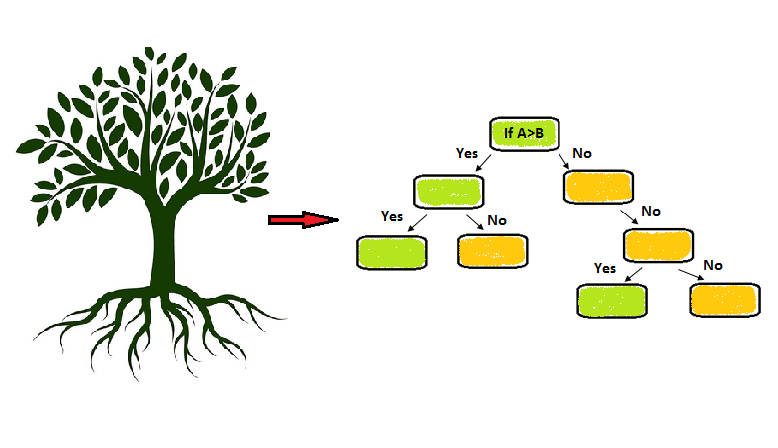
#### image credit: https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsai.net%2Fp%2Fmachine-learning%2Ffully-explained-decision-tree-classification-with-python&psig=AOvVaw2OawgimDboIaLl4a8paEI7&ust=1690660244536000&source=images&cd=vfe&opi=89978449&ved=0CBAQjRxqFwoTCLCs6sqWsoADFQAAAAAdAAAAABAD

### - supervised learning model for classification and regression of datasets
### - each box or decision node has a certain condition that filters certain data to other nodes

# 1) Import Libraries

In [26]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

# 2) Retrieve Data

### 2a) Pull csv file

In [27]:
data = pd.read_csv("bodyPerformance.csv")
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,the_class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


### 2b)  Convert Class of Body Performance (A,B,C) and gender to Numbers (0,1,2)

### the learning model will only process integers

In [28]:
integer = preprocessing.LabelEncoder()

the_class = integer.fit_transform(list(data["the_class"]))

the_class

array([2, 0, 2, ..., 0, 3, 2], dtype=int64)

In [29]:
df  = pd.read_csv("bodyPerformance.csv")


#create dictionary to convert letters to numbers for respective columns in dataset
letters_to_num_bodyPerf = {
    "A" : 1,
    "B" : 2,
    "C" : 3,
    "D" : 4,
    
}

gender_to_num = {
    "F" : 0,
    "M" : 1
    
    
}

df['the_class'] = df['the_class'].map(letters_to_num_bodyPerf)
df['gender'] = df['gender'].map(gender_to_num)

#making new file for dataset to use
df.to_csv('modified_bodyPerformance.csv', index=False)

In [30]:
df  = pd.read_csv("modified_bodyPerformance.csv")

#get 1/7 of dataset
partial_data = len(df) // 7
df_half = df[:partial_data]

df_half.to_csv('modified_bodyPerformance.csv', index=False)

## Open modified file

In [31]:
data = pd.read_csv("modified_bodyPerformance.csv")
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,the_class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,3
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,3
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1908,29.0,1,180.1,72.40,13.8,91.0,155.0,48.4,15.2,52.0,223.0,1
1909,57.0,0,155.8,52.50,32.3,70.0,135.0,19.3,20.6,28.0,137.0,2
1910,25.0,0,160.2,42.10,17.5,73.0,113.0,21.6,19.1,5.0,124.0,4
1911,28.0,1,177.9,59.70,13.1,90.0,143.0,40.9,23.0,70.0,247.0,1


### 2c) Seperate data into "test" and "train"

In [32]:
from sklearn.model_selection import train_test_split
x_data = df_half.drop(columns=['the_class'])
y_data = df_half["the_class"]
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size = .2)

# 3) Get Decision Tree Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
my_classifier = DecisionTreeClassifier(max_depth=2)
my_classifier = my_classifier.fit(X_train,y_train)

In [34]:
my_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [35]:
#shows us how the decision tree model used our data to produce output
#used 4018 rows for test
X_test

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
675,29.0,1,184.3,89.5,17.8,77.0,127.0,54.7,21.7,54.0,234.0
1424,21.0,0,172.7,61.0,24.6,70.0,108.0,27.2,20.8,56.0,178.0
1493,35.0,0,160.7,58.4,31.5,66.0,120.0,24.1,20.4,27.0,150.0
1877,40.0,1,174.5,77.7,29.3,82.0,123.0,29.3,8.4,35.0,159.0
1733,54.0,1,157.2,54.0,21.6,90.0,135.0,33.2,15.5,27.0,177.0
...,...,...,...,...,...,...,...,...,...,...,...
170,48.0,1,167.2,68.5,28.2,75.0,112.0,39.2,7.0,31.0,195.0
266,62.0,1,174.7,71.9,23.6,74.0,130.0,41.2,16.6,40.0,205.0
729,33.0,1,172.7,66.1,18.3,70.0,107.0,42.4,18.0,51.0,221.0
1811,30.0,0,158.2,52.9,27.8,74.0,137.0,26.9,23.9,32.0,172.0


In [36]:
#see how model predicted body performance
my_predictions = my_classifier.predict(X_test)
my_predictions

array([1, 1, 1, 3, 1, 4, 4, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 4, 3, 3, 1, 1, 4, 3, 3, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 4, 1, 3, 3, 1, 1, 3, 4, 3, 1, 1, 1, 4, 1, 1, 4,
       1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 4, 3, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 4, 3, 1, 3, 1,
       1, 4, 3, 3, 3, 4, 1, 1, 1, 1, 3, 1, 4, 1, 1, 3, 3, 1, 3, 3, 1, 4,
       3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 1, 1, 3, 1, 3, 1, 4, 1, 1, 1, 3, 4, 3, 1, 3, 1, 1, 3, 1, 4, 4,
       1, 4, 1, 3, 4, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 4, 3, 4, 1, 4, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 4, 1, 3,
       1, 1, 1, 3, 4, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 3, 3, 1, 4, 3, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 4, 1, 4, 3, 1, 1,

In [37]:
#see how decision tree model makes decision for each node and how sure it is for making decision
my_classifier.predict_proba(X_test)

array([[0.40952381, 0.275     , 0.20238095, 0.11309524],
       [0.40952381, 0.275     , 0.20238095, 0.11309524],
       [0.40952381, 0.275     , 0.20238095, 0.11309524],
       ...,
       [0.40952381, 0.275     , 0.20238095, 0.11309524],
       [0.40952381, 0.275     , 0.20238095, 0.11309524],
       [0.0698324 , 0.31843575, 0.44134078, 0.17039106]])

## My "Body Performance" label has 4 categories for the model to categorize the test data in - 1,2,3,or 4. Each column of the array represents each of those numbers to the respective columns.

### if we change the number of decision nodes for the decision tree to evaluate what category each data point goes in, it becomes less certain about which category to choose. The more decision nodes the more accurate.

### the larger the test size, the more accurate

### after trial and error, max depth = 3 

# 4) Evaluate Model's Performance

## 4a) Model's accuracy

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, my_predictions)

0.4595300261096606

## 4b) Confusion Matrix
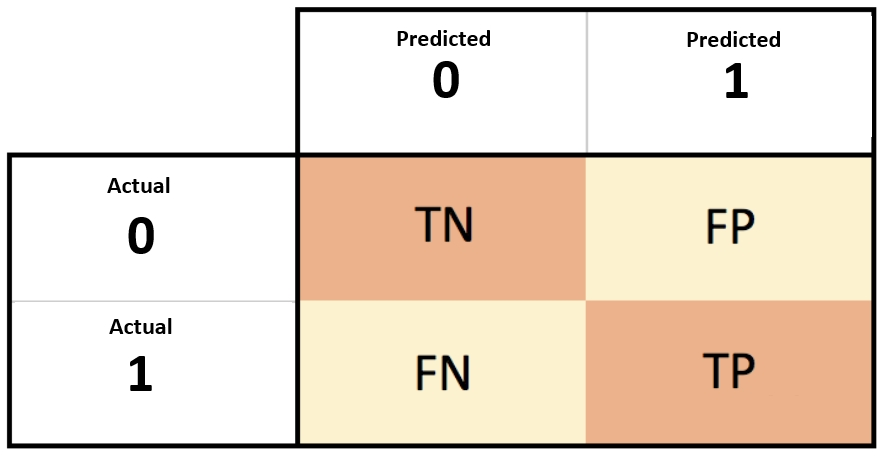

### shows how the model correctly/incorrectly categorized data it predicted and how it compares to the actual lable for the data used

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, my_predictions, labels= [1,2,3,4])

array([[83,  0,  4,  0],
       [60,  0, 33,  0],
       [47,  0, 49,  5],
       [20,  0, 38, 44]], dtype=int64)

# X O O O
# O X O O
# O O X O
# O O O X

### Any spot where X is means the model predicted correctly for x number of data points

## 4c) Precision score